# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

In [38]:
demo = pd.read_csv('./data/demo_encodade.csv')

In [39]:
demo.shape

(16650, 33)

In [40]:
y = demo['mau']

In [41]:
X = demo.drop('mau',axis=1)

In [42]:
X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [43]:
clf = DecisionTreeClassifier(random_state=100)

In [44]:
clf = clf.fit(X_train,y_train)

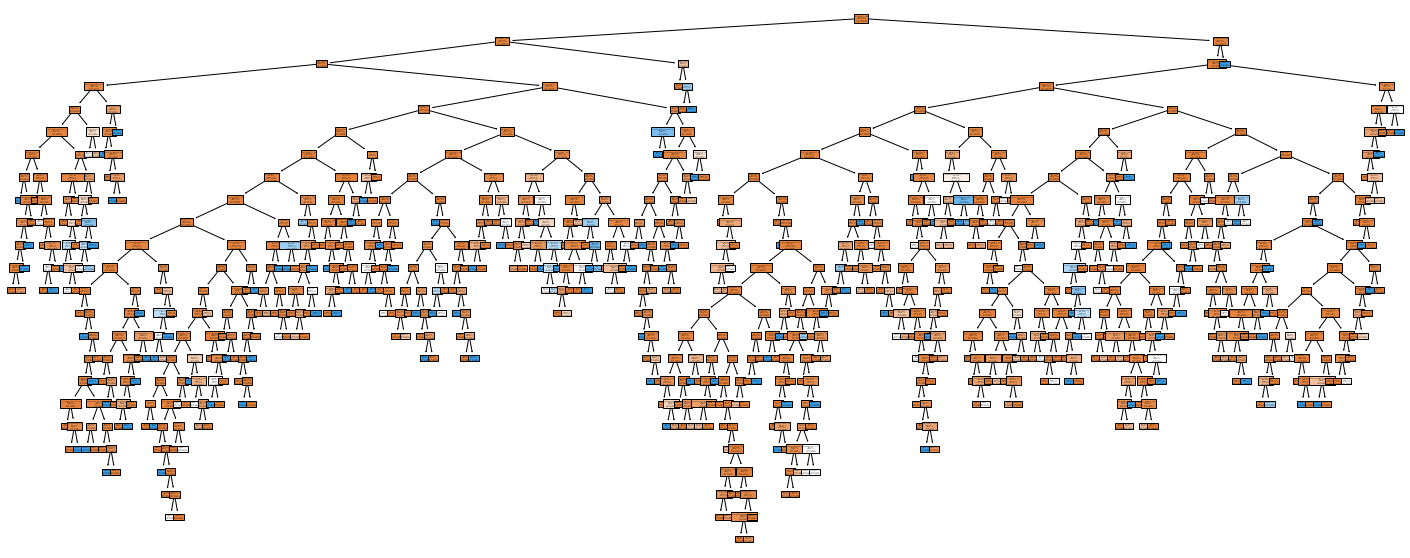

In [45]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

C:\Users\Kleiton Rocha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


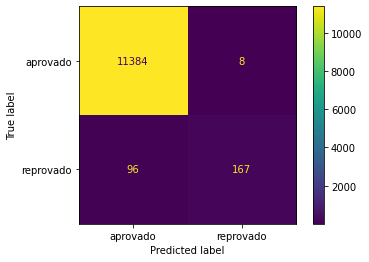

In [50]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovado', 'reprovado']);

In [66]:
acuracia_treino = round(accuracy_score(y_train,clf.predict(X_train))*100,2)
acuracia_teste = round(accuracy_score(y_teste,clf.predict(X_teste))*100,2)

print(f'A acuracia da amostra de treino é {acuracia_treino}%')
print(f'A acuracia da amostra de teste é {acuracia_teste}%')

A acuracia da amostra de treino é 99.11%
A acuracia da amostra de teste é 96.86%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [70]:
teste_predict = clf.predict(X_teste)

C:\Users\Kleiton Rocha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


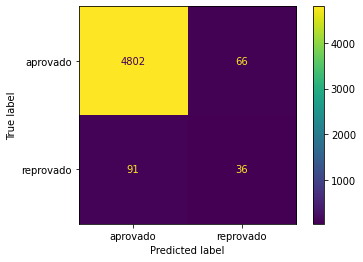

In [51]:
plot_confusion_matrix(clf, X_teste, y_teste, display_labels=['aprovado', 'reprovado']);

In [80]:
clf_pre_pruning = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10,random_state=123)
clf_pre_pruning = clf_pre_pruning.fit(X_train,y_train)

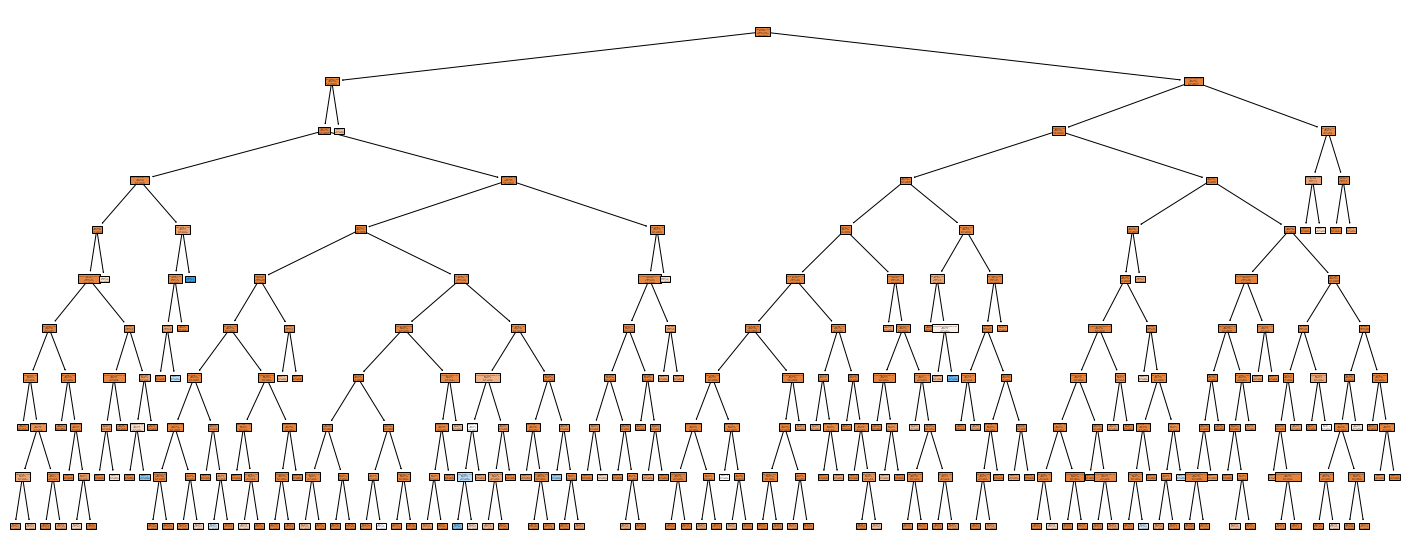

In [81]:
plt.figure(figsize=(25,10))
plot_tree(clf_pre_pruning,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

C:\Users\Kleiton Rocha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


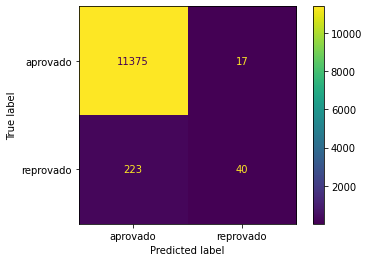

In [82]:
plot_confusion_matrix(clf_pre_pruning,X_train,y_train,display_labels=['aprovado', 'reprovado'])

In [83]:
accuracy_score(y_train,clf_pre_pruning.predict(X_train))

0.9794079794079794

In [66]:
acuracia_treino = round(accuracy_score(y_train,clf.predict(X_train))*100,2)
acuracia_teste = round(accuracy_score(y_teste,clf.predict(X_teste))*100,2)

print(f'A acuracia da amostra de treino é {acuracia_treino}%')
print(f'A acuracia da amostra de teste é {acuracia_teste}%')

A acuracia da amostra de treino é 99.11%
A acuracia da amostra de teste é 96.86%


In [85]:
acuracia_treino_podada = round(accuracy_score(y_train,clf_pre_pruning.predict(X_train))*100,2)
acuracia_teste_podada = round(accuracy_score(y_teste,clf_pre_pruning.predict(X_teste))*100,2)

print(f'A acuracia da amostra de treino podada é {acuracia_treino_podada}%')
print(f'A acuracia da amostra de teste podada é {acuracia_teste_podada}%')

A acuracia da amostra de treino podada é 97.94%
A acuracia da amostra de teste podada é 97.28%


In [108]:
accuracy_score(y.array,np.full(shape=len(y),fill_value=1))

0.023423423423423424